In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.color_palette("husl", 8)

# # Set the font family and size
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams["text.usetex"] = False
# plt.rcParams['font.size'] = 12
# plt.rcParams['figure.figsize'] = (3.5,4)
# plt.rcParams['figure.dpi'] = 200

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [3]:
import pandas as pd
from plaid.constants import COMPRESSION_INPUT_DIMENSIONS, COMPRESSION_SHORTEN_FACTORS

def mapping_fn(model_id, mode='dim'):
    assert mode in ['dim', 'shorten']
    if model_id == "identity":
        return 1024
    else:
        try:
            if mode == "dim":
                return COMPRESSION_INPUT_DIMENSIONS[model_id]
            elif mode == "shorten":
                return COMPRESSION_SHORTEN_FACTORS[model_id]
        except:
            return np.nan


In [4]:
csv_path = "plaid_csvs/diffusion_cath.csv"
df = pd.read_csv(csv_path, sep=",")
print(df.shape)

(16, 249)


In [5]:
df['input_dim'] = df['cfg.compression_model_id'].map(lambda x: mapping_fn(x, 'dim'))

In [6]:
df['shorten_dim'] = df['cfg.compression_model_id'].map(lambda x: mapping_fn(x, 'shorten')) 

In [7]:
df = df.sort_values(by="input_dim")

In [8]:
df.head()

,Name,cfg.denoiser.depth,Runtime,ID,cfg.compression_model_id,cfg.datamodule.h5_root_dir,lr,State,Notes,User,...,cfg.beta_scheduler._target_,cfg.denoiser.use_self_conditioning,cfg.diffusion.sequence_decoder_weight,cfg.callbacks.sample.calc_sequence_properties,cfg.denoiser.input_dim_if_different,cfg.denoiser.input_dim,cfg.input_dim,cfg.dit.input_dim,input_dim,shorten_dim
3,flowing-surf-285,4,30782,tmc1otna,8ebs7j9h,/homefs/home/lux70/storage/data/cath/compressed/,0.0001,crashed,-,lu-amy-al1,...,plaid.diffusion.beta_schedulers.ADMCosineBetaS...,False,0,True,NaN,NaN,NaN,NaN,4,2
8,balmy-wildflower-281,4,111136,gzkug3bi,8ebs7j9h,/homefs/home/lux70/storage/data/cath/compressed/,0.0001,crashed,-,lu-amy-al1,...,plaid.diffusion.beta_schedulers.ADMCosineBetaS...,False,0,True,NaN,NaN,NaN,NaN,4,2
12,golden-mountain-276,4,111126,5006fhbi,kyytc8i9,/homefs/home/lux70/storage/data/cath/compressed/,0.0001,crashed,-,lu-amy-al1,...,plaid.diffusion.beta_schedulers.ADMCosineBetaS...,False,0,True,NaN,NaN,NaN,NaN,16,2
2,still-wildflower-287,4,30691,619wbotd,kyytc8i9,/homefs/home/lux70/storage/data/cath/compressed/,0.0001,crashed,-,lu-amy-al1,...,plaid.diffusion.beta_schedulers.ADMCosineBetaS...,False,0,True,NaN,NaN,NaN,NaN,16,2
1,autumn-forest-287,4,30676,hans3jy0,fbbrfqzk,/homefs/home/lux70/storage/data/cath/compressed/,0.0001,crashed,-,lu-amy-al1,...,plaid.diffusion.beta_schedulers.ADMCosineBetaS...,False,0,True,NaN,NaN,NaN,NaN,32,2


In [9]:
df.input_dim.unique()

array([   4,   16,   32,   64,  128,  256,  512, 1024])

In [10]:
cols_to_keep = list(filter(lambda x: "sampled/" in x, df.columns))
cols_to_keep += ['input_dim','shorten_dim','ID','Runtime']
print(cols_to_keep)

['sampled/fid', 'sampled/kid', 'sampled/latent_mean', 'sampled/latent_std', 'sampled/perplexity_mean', 'sampled/plddt_max', 'sampled/plddt_mean', 'sampled/plddt_min', 'sampled/plddt_std', 'sampled/pae_max', 'sampled/pae_mean', 'sampled/ptm_max', 'sampled/ptm_mean', 'sampled/pae_median', 'sampled/plddt_median', 'sampled/ptm_median', 'input_dim', 'shorten_dim', 'ID', 'Runtime']


In [11]:
filtered_df = df.filter(cols_to_keep, axis=1)
print(filtered_df.shape)
display(filtered_df)

(16, 20)


,sampled/fid,sampled/kid,sampled/latent_mean,sampled/latent_std,sampled/perplexity_mean,sampled/plddt_max,sampled/plddt_mean,sampled/plddt_min,sampled/plddt_std,sampled/pae_max,sampled/pae_mean,sampled/ptm_max,sampled/ptm_mean,sampled/pae_median,sampled/plddt_median,sampled/ptm_median,input_dim,shorten_dim,ID,Runtime
3,19.065260,0.044813,NaN,NaN,12.978628,NaN,25.913937,NaN,NaN,NaN,27.975361,NaN,27.975361,27.942207,25.791142,27.942207,4,2,tmc1otna,30782
8,18.822821,0.044649,NaN,NaN,11.389961,NaN,26.040194,NaN,NaN,NaN,28.221405,NaN,28.221405,28.251598,26.230408,28.251598,4,2,gzkug3bi,111136
12,53.840882,0.149395,NaN,NaN,12.560185,NaN,25.225563,NaN,NaN,NaN,25.941753,NaN,25.941753,26.136635,24.932848,26.136635,16,2,5006fhbi,111126
2,33.137310,0.088889,NaN,NaN,16.622555,NaN,23.510111,NaN,NaN,NaN,27.376856,NaN,27.376856,27.398205,23.280647,27.398205,16,2,619wbotd,30691
1,29.889375,0.080916,NaN,NaN,18.167471,NaN,26.892918,NaN,NaN,NaN,29.047644,NaN,29.047644,29.064526,27.011059,29.064526,32,2,hans3jy0,30676
11,40.722756,0.113092,NaN,NaN,13.724923,NaN,27.239134,NaN,NaN,NaN,28.078112,NaN,28.078112,28.359949,27.180927,28.359949,32,2,6nahhz22,111134
13,64.217088,0.189593,NaN,NaN,19.422600,NaN,26.342175,NaN,NaN,NaN,28.405468,NaN,28.405468,28.455805,26.365986,28.455805,64,2,0u6sw28c,111135
0,46.111354,0.131540,NaN,NaN,19.364193,NaN,26.540642,NaN,NaN,NaN,29.836233,NaN,29.836233,29.869884,26.568089,29.869884,64,2,rb1h0evt,30691
10,40.122079,0.112024,NaN,NaN,16.796976,NaN,16.360590,NaN,NaN,NaN,27.239159,NaN,27.239159,27.222969,16.326523,27.222969,128,2,ftqrhze9,111132
5,39.669689,0.111845,NaN,NaN,18.091286,NaN,20.278452,NaN,NaN,NaN,28.604660,NaN,28.604660,28.572256,20.520826,28.572256,128,2,obsof1vs,31502


In [12]:
df.input_dim.unique()

array([   4,   16,   32,   64,  128,  256,  512, 1024])

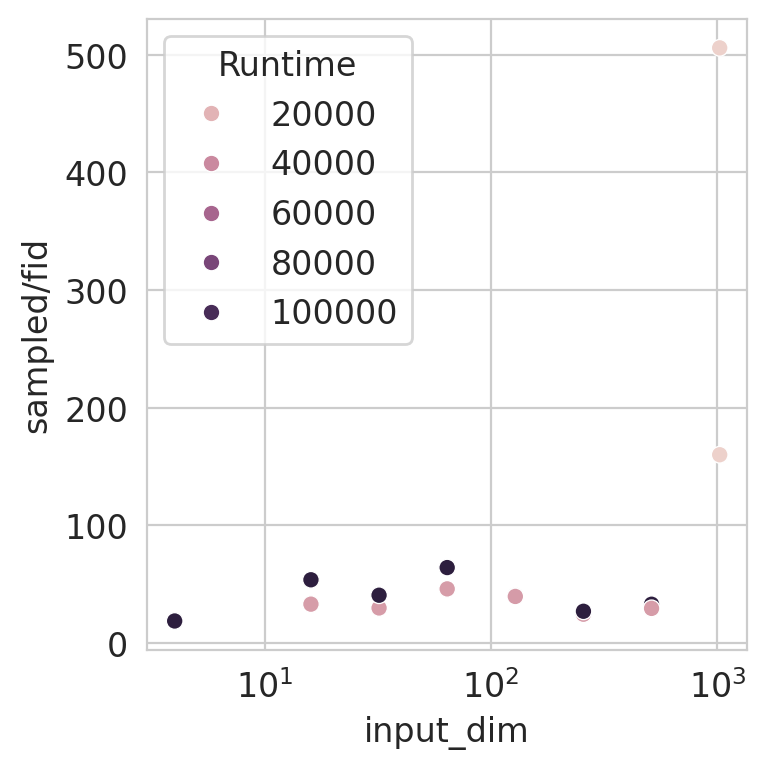

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=df, x="input_dim", y="sampled/fid",hue="Runtime")

# general 
plt.tight_layout()
xticks = df.input_dim.unique() 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xticks)
_ = ax.set_xscale("log")

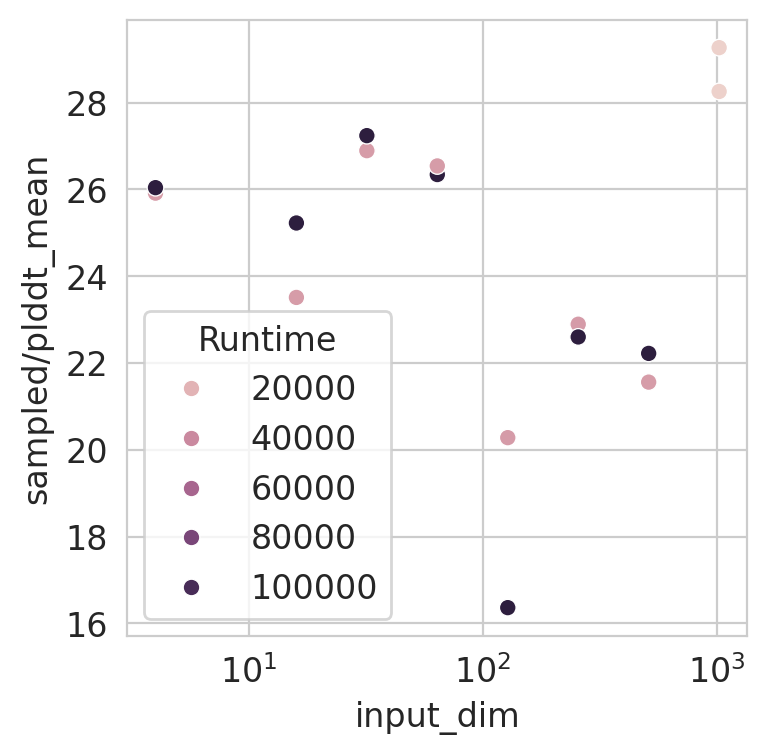

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=df, x="input_dim", y="sampled/plddt_mean",hue="Runtime")
ax.set_xscale("log")

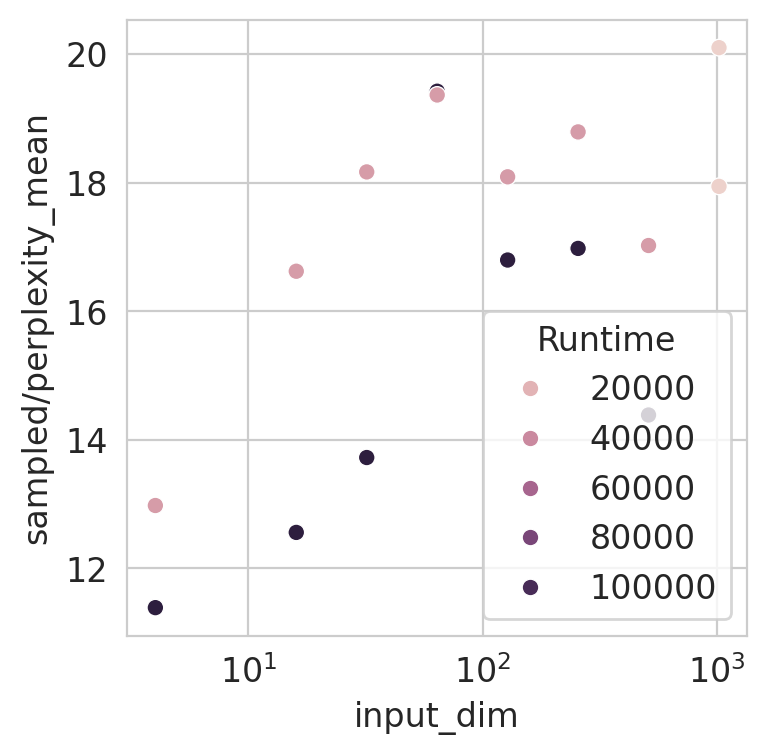

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=df, x="input_dim", y="sampled/perplexity_mean",hue="Runtime")
ax.set_xscale("log")

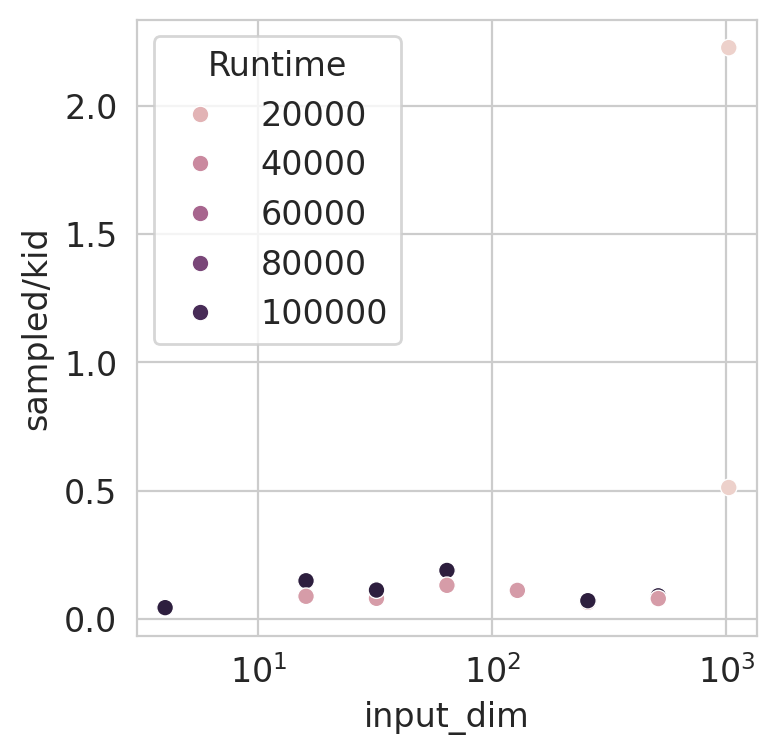

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=df, x="input_dim", y="sampled/kid", hue="Runtime")
ax.set_xscale("log")